In [5]:
from Aymeric.decode_img import get_img, get_org_img, header_reader, convert
import matplotlib.pyplot as plt
import numpy as np
from Thibault.test import *

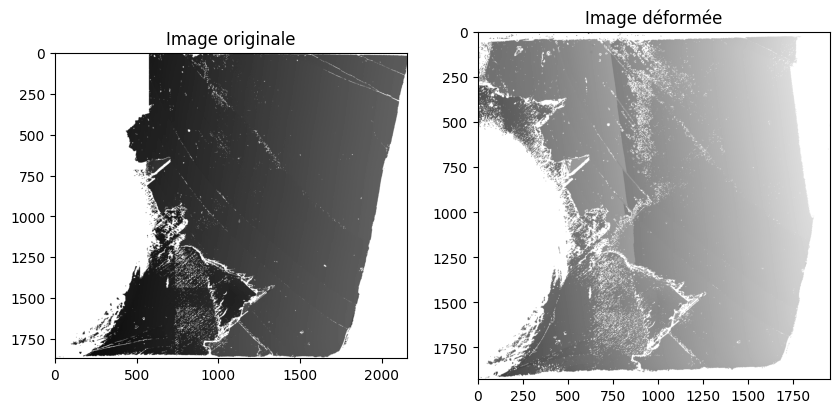

(1870, 2157)
242
(1928, 1956)


In [6]:
img1 = get_img('data//CALSPAR16C_init-to-d7//CALSPAR16C_d1_image2-20x.dat', type = 'phase')
img2 = get_img('data//CALSPAR16C_init-to-d7//CALSPAR16C_d3_image2-20x.dat', type = 'phase')
org_img1 = get_org_img(header_reader('data//CALSPAR16C_init-to-d7//CALSPAR16C_d1_image2-20x.dat'), type = 'phase')
org_img2 = get_org_img(header_reader('data//CALSPAR16C_init-to-d7//CALSPAR16C_d3_image2-20x.dat'), type = 'phase')


plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title('Image originale')
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.title('Image déformée')
plt.show()

print(img1.shape)
print(img1[264, 85])

print(img2.shape)


In [7]:
def apply_recadr_2D(img, s,R,t):
    true_R = np.array([[R[0,0], R[0,1], 0], [R[1,0], R[1,1], 0], [0, 0, 1]])
    true_t = np.array([t[0], t[1], 0])
    
    YT = s * np.dot(img, true_R) + true_t   

    YT[:,:,0] -= YT[:,:,0].min() 
    YT[:,:,1] -= YT[:,:,1].min()
    


    tab = np.empty((YT[:,:,0].max().astype(int) + 1, YT[:,:,1].max().astype(int)+1))
    tab[YT[:, :, 0].astype(int), YT[:, :, 1].astype(int)] = YT[:, :, -1]
    return tab


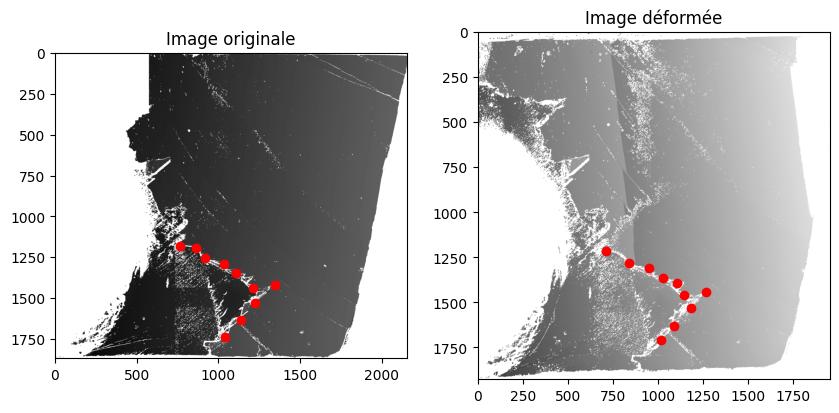

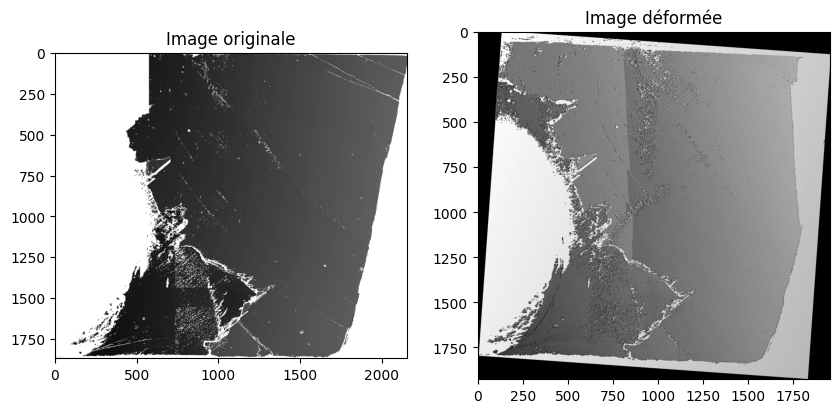

0.9352349935083959 [[ 0.99744219 -0.07092883 -0.00884206]
 [ 0.07067322  0.99714811 -0.02647549]
 [ 0.01069472  0.02578288  0.99961036]] [-87.43157921 175.17154072 122.62039226]


In [8]:
import json

with open('data//proj//project.json', 'r') as f :
    data = json.load(f)

l_p_1 = np.array(data['img_dict']['p1'][0])
l_p_2 = np.array(data['img_dict']['p1'][2])


l_p_1_augm = np.empty((l_p_1.shape[0], 3))
l_p_2_augm = np.empty((l_p_2.shape[0], 3))

l_p_1_augm[:,:2] = l_p_1
l_p_2_augm[:,:2] = l_p_2

l_p_1_augm[:,2] = img1[l_p_1[:,1].astype(int), l_p_1[:,0].astype(int)]
l_p_2_augm[:,2] = img2[l_p_2[:,1].astype(int), l_p_2[:,0].astype(int)]


s, R, t = recadrage_cpd(l_p_2_augm, l_p_1_augm)


img2_formt = format_img(img2)
img2_recad, min_x, min_y, min_z = apply_recadr(img2_formt, s, R, t)


plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.plot(l_p_1[:,0], l_p_1[:,1], 'ro')
plt.title('Image originale')
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.plot(l_p_2_augm[:,0], l_p_2_augm[:,1], 'ro')
plt.title('Image déformée')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title('Image originale')
plt.subplot(1,2,2)
plt.imshow(img2_recad, cmap='gray')
plt.title('Image déformée')
plt.show()

print(s, R, t)

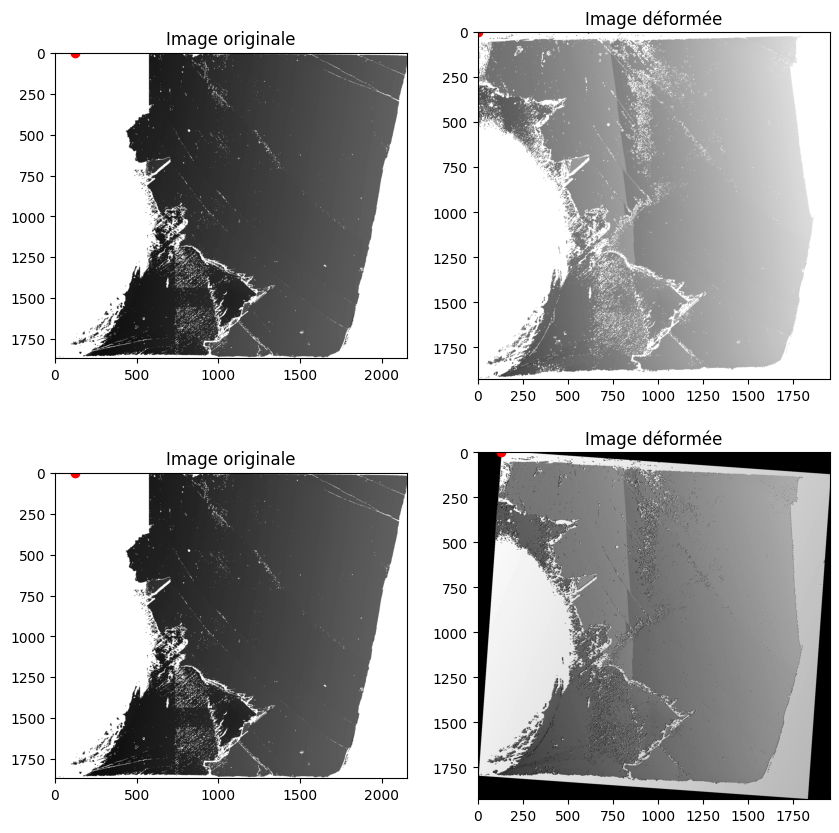

In [11]:
with open('data//proj//project.json', 'r') as f :
    data = json.load(f)

l_p_1 = np.array(data['img_dict']['p1'][0])
l_p_2 = np.array(data['img_dict']['p1'][2])
header_1_ = header_reader('data//proj//CALSPAR16C_d1_image2-20x.dat')
header_2_ = header_reader('data//proj//CALSPAR16C_d2_image2-20x.dat')
org_img1_ = get_org_img(header_reader('data//proj//CALSPAR16C_d1_image2-20x.dat'), type = 'phase')
org_img2_ = get_org_img(header_reader('data//proj//CALSPAR16C_d3_image2-20x.dat'), type = 'phase')

img1_ = get_img('data//proj//CALSPAR16C_d1_image2-20x.dat', type = 'phase')
img2_ = get_img('data//proj//CALSPAR16C_d3_image2-20x.dat', type = 'phase')

org_calc = s*np.dot(org_img2[:,0], R) + t
org_calc -= np.array([min_x, min_y, min_z])
org_calc[0], org_calc[1] = org_calc[1], org_calc[0]

org_calc = org_calc[:, np.newaxis]
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.plot(org_img1[0,0], org_img1[1,0], 'ro')
plt.title('Image originale')
plt.subplot(2,2,2)
plt.imshow(img2, cmap='gray')
plt.plot(org_img2[0,0], org_img2[1,0], 'ro')
plt.title('Image déformée')
plt.subplot(2,2,3)
plt.imshow(img1_, cmap='gray')
plt.plot(org_img1_[0,0], org_img1_[1,0], 'ro')
plt.title('Image originale')
plt.subplot(2,2,4)
plt.imshow(img2_, cmap='gray')
plt.plot(org_img2_[0,0], org_img2_[1,0], 'ro')

plt.title('Image déformée')
plt.show()

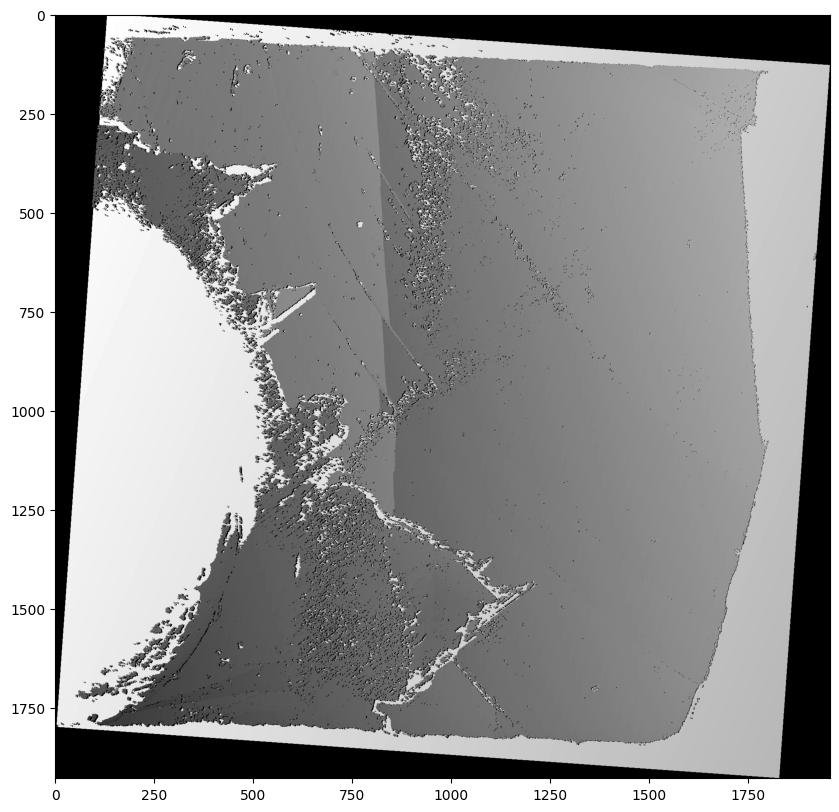

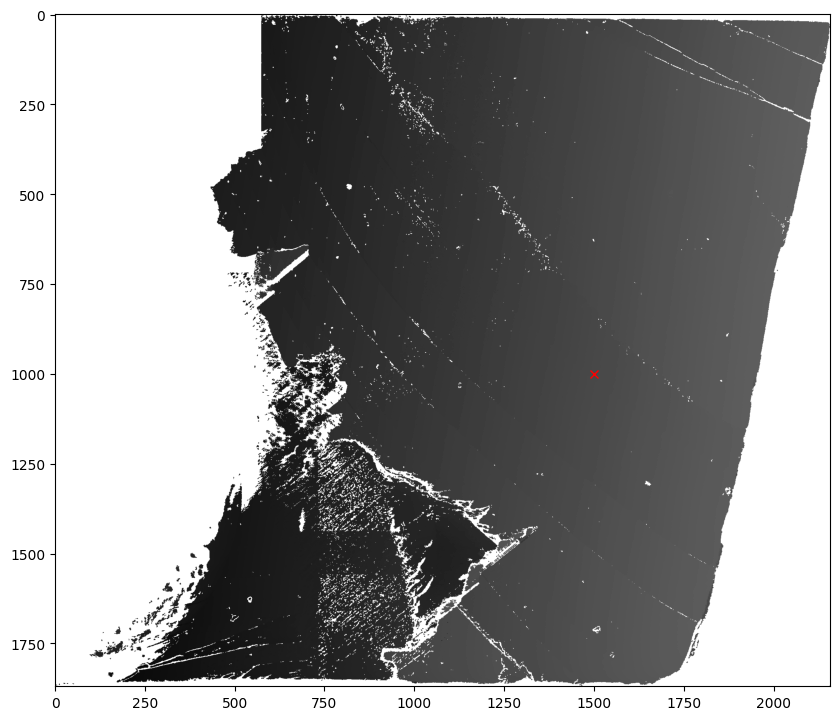

35
1.2004692674585094e-109


In [20]:
img1__ = convert(header_1_, img1_, 'meter')

img2__ = convert(header_2_, img2_, 'meter')

plt.figure(figsize=(10,10))
plt.imshow(img2__, cmap='gray')
plt.show()


plt.figure(figsize=(10,10))
plt.imshow(img1__, cmap='gray')
plt.plot(1500, 1000, 'rx')
plt.show()

S
print(img1[1500,1000])
print(img1__[1500, 1000])

In [22]:
img1 = get_img('data//CALSPAR15C_init-to-d7//CALSPAR15C_d2_image1-5x.dat', 'phase')
header1 = header_reader('data//CALSPAR15C_init-to-d7//CALSPAR15C_d2_image1-5x.dat')

X = convert(header1, np.arange(0, img1.shape[0]), 'meter')
Y = convert(header1, np.arange(0, img1.shape[1]), 'meter')
img1_c = convert(header1, img1, 'meter')

print(X)


[0.00000000e+00 8.69750973e-12 1.73950195e-11 2.60925292e-11
 3.47900389e-11 4.34875486e-11 5.21850584e-11 6.08825681e-11
 6.95800778e-11 7.82775875e-11 8.69750973e-11 9.56726070e-11
 1.04370117e-10 1.13067626e-10 1.21765136e-10 1.30462646e-10
 1.39160156e-10 1.47857665e-10 1.56555175e-10 1.65252685e-10
 1.73950195e-10 1.82647704e-10 1.91345214e-10 2.00042724e-10
 2.08740233e-10 2.17437743e-10 2.26135253e-10 2.34832763e-10
 2.43530272e-10 2.52227782e-10 2.60925292e-10 2.69622802e-10
 2.78320311e-10 2.87017821e-10 2.95715331e-10 3.04412840e-10
 3.13110350e-10 3.21807860e-10 3.30505370e-10 3.39202879e-10
 3.47900389e-10 3.56597899e-10 3.65295409e-10 3.73992918e-10
 3.82690428e-10 3.91387938e-10 4.00085447e-10 4.08782957e-10
 4.17480467e-10 4.26177977e-10 4.34875486e-10 4.43572996e-10
 4.52270506e-10 4.60968015e-10 4.69665525e-10 4.78363035e-10
 4.87060545e-10 4.95758054e-10 5.04455564e-10 5.13153074e-10
 5.21850584e-10 5.30548093e-10 5.39245603e-10 5.47943113e-10
 5.56640622e-10 5.653381